In [248]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
import indicators as indi
from ta import *

In [250]:
## Read and filter the data

df = pd.read_csv("./OMXS30.csv");
df.head()

print(df.shape)
df = df[df["open"] > 0]
df = df[df["high"] > 0]
df = df[df["low"] > 0]
df = df[df["close"] > 0]

print(df.shape)





(8836, 5)
(5078, 5)


,date,high,low,close,open,0
3755,915404400000,729.6800,701.3100,727.1009,701.3100,NaN
3756,915490800000,735.7300,725.3400,736.0878,727.1000,NaN
3757,915663600000,756.7000,725.8900,739.8075,736.0900,NaN
3758,915750000000,749.0200,736.9500,738.7122,739.8100,NaN
3759,916009200000,741.9700,722.2500,723.7918,738.7100,NaN
3760,916095600000,726.9900,708.7100,710.4216,723.7900,NaN
3761,916182000000,710.4200,675.5600,689.0455,710.4200,NaN
3762,916268400000,700.4500,682.6100,696.0605,689.0500,NaN
3763,916354800000,701.7000,678.8100,695.9316,696.0600,NaN
3764,916614000000,718.3700,695.9300,717.9426,695.9300,29.12063


In [ ]:
## ATRx§
dfATR = pd.DataFrame()
dfATR['ATR1'] = abs(df['high'] - df['low'])
dfATR['ATR2'] = abs(df['high'] - df['close'].shift(-1))
dfATR['ATR3'] = abs(df['low'] - df['close'].shift(-1))

dfATR = dfATR.max(axis=1)
lol = dfATR.rolling(window=10).mean()
pd.concat([df, lol], axis=1, sort=False)


In [246]:
## Add indicators

df['MA_5'] = df['close'].rolling(window=5).mean()
df['MA_10'] = df['close'].rolling(window=10).mean()
df['MA_20'] = df['close'].rolling(window=20).mean()


#Rate of Change  
# df = indi.ROC(df, 10)
# df = indi.ROC(df, 20)

#Average True Range  
df = indi.ATR(df, 10)
df = indi.ATR(df, 20)

#Pivot Points, Supports and Resistances  
df = indi.PPSR(df)

#Stochastic oscillator %K  
df = indi.STOK(df)

#Relative Strength Index  
# df = indi.RSI(df, 10)
# df = indi.RSI(df, 20)

#Standard Deviation
df['STDDEV_2'] =  df['close'].rolling(window=2).std()
df['STDDEV_5'] =  df['close'].rolling(window=5).std()
df['STDDEV_10'] =  df['close'].rolling(window=10).std()

df = df[::-1]
df["PP%"]= ((df["PP"] / df["PP"].shift(-1))-1)
df["R1%"]= ((df["R1"] / df["R1"].shift(-1))-1)
df["R2%"]= ((df["R2"] / df["R2"].shift(-1))-1)
df["R3%"]= ((df["R3"] / df["R3"].shift(-1))-1)
df["S1%"]= ((df["S1"] / df["S1"].shift(-1))-1)
df["S2%"]= ((df["S2"] / df["S2"].shift(-1))-1)
df["S3%"]= ((df["S3"] / df["S3"].shift(-1))-1)



df["gap%"]= ((df["open"] / df["close"].shift(-1))-1)
df["high%"]= ((df["high"] / df["open"].shift(-1))-1)
df["low%"]= ((df["low"] / df["low"].shift(-1))-1)
df["close%"]= ((df["close"] / df["close"].shift(-1))-1)


df["MA_5%"]= ((df["MA_5"] / df["close"])-1)
df["MA_10%"]= ((df["MA_10"] / df["close"])-1)
df["MA_20%"]= ((df["MA_20"] / df["close"])-1)

df['signal'] = df["close"] > df["close"].shift(-1)

df = df[::-1]

# df['signal'] = pd.to_numeric(df['signal'], errors='coerce')


df['signal'] = df['signal'].astype(int).shift(-1)

print(df.shape)
df = df.dropna()
print(df.shape)
df.head()


KeyError: 1

In [143]:
dfC = df[[
 'gap%',
 'high%',
 'low%',
 'close%',
 'SO%k',
 'STDDEV_2',
 'STDDEV_5',
 'STDDEV_10',
 'PP%',
 'R1%',
 'R2%',
 'R3%',
 'S1%',
 'S2%',
 'S3%',
 'MA_5%',
 'MA_10%',
 'MA_20%',
 'signal']]
dfC.head()

,gap%,high%,low%,close%,SO%k,STDDEV_2,STDDEV_5,STDDEV_10,PP%,R1%,R2%,R3%,S1%,S2%,S3%,MA_5%,MA_10%,MA_20%,signal
3774,5.122055e-06,0.024811,0.006507,0.014856,0.808417,7.588246,16.525841,14.337710,0.009952,0.013346,0.011861,0.015187,0.011444,0.007980,0.009479,-0.027103,-0.031613,-0.026452,1.0
3775,3.137372e-06,0.018896,0.000374,0.000788,0.824783,0.408637,13.709632,15.932497,0.000560,0.000743,0.000698,0.000876,0.000605,0.000417,0.000462,-0.016692,-0.030584,-0.026770,0.0
3776,5.997201e-06,0.009289,0.007860,-0.002079,0.330475,1.078621,7.251960,17.175054,0.003669,-0.000429,0.001198,-0.002801,0.002030,0.006233,0.004582,-0.005908,-0.026649,-0.025012,1.0
3777,-2.731680e-07,0.023702,0.005259,0.009148,0.354027,4.736201,5.994526,18.858154,0.009856,0.014390,0.019541,0.023939,0.004537,-0.000139,-0.005635,-0.009231,-0.031103,-0.033915,0.0
3778,2.436224e-06,0.019532,0.003852,-0.002068,0.204739,1.080318,2.901954,18.157767,-0.001498,-0.006725,-0.011255,-0.016245,0.003288,0.008771,0.013834,-0.003122,-0.023149,-0.032008,0.0


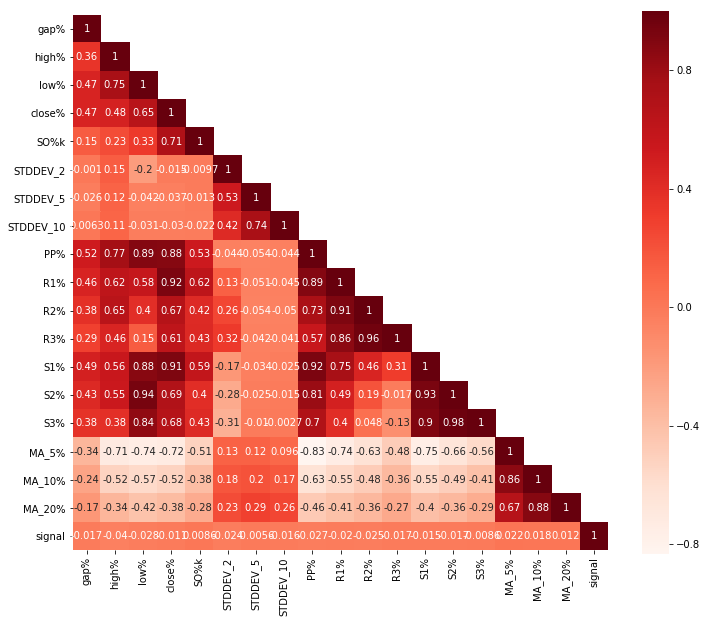

In [144]:
#corelation matrix.
corr= dfC.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=corr,mask=mask,square=True,annot=True,cbar=True,cmap=plt.cm.Reds)

In [148]:
corr_target = abs(corr["signal"])

relevant_features = corr_target[corr_target>0.02]
relevant_features

high%       0.040335
low%        0.027697
STDDEV_2    0.024247
PP%         0.026762
R2%         0.025303
MA_5%       0.022275
signal      1.000000
Name: signal, dtype: float64

In [153]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


X = dfC[[
 'high%',
 'low%',
 'STDDEV_2',
 'PP%',
 'R2%',
 'MA_5%']]
X = preprocessing.scale(X)
Y = dfC[["signal"]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [154]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.5158102766798419
[[415 311]
 [424 368]]


C:\Users\joaki\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\joaki\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [155]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

C:\Users\joaki\AppData\Local\Programs\Python\Python35\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.530961791831357
[[130 596]
 [116 676]]
